In [1]:
import sys
import os

# Absolute path to your module's directory
module_path = os.path.abspath('/localscratch/zippoema/git/HPA/src/')
if module_path not in sys.path:
    sys.path.insert(0, module_path)

import hpa.cluster as hpacl  # Now this should work
import hpa.util as hpau  # Now this should work

/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:160: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import gsd.hoomd 

In [3]:
plt.style.use('default')
plt.style.use('/localscratch/zippoema/md_plots/rates_plot.mplstyle')

In [4]:
path_200 = '/localscratch/zippoema/project_ness/simulations/200-tdp43_CAL3/'
path_bckp = '/localscratch/zippoema/zippo_phd_data_bckp/project_hps_phospho_tdp43_natcomm_bckp/'
path_an_200 = '/localscratch/zippoema/project_ness/analysis/200-tdp43_CAL3/'
path_dp = '/localscratch/zippoema/project_ness/simulations/condensate_dephospho/'

In [5]:
step = 20
times = np.arange(200,2500,step, dtype=int)-1


### Size of the cluster

In [8]:
nc_5ck1d, np_5ck1d = hpacl.chains_in_condensate(path_200+'sim_200-tdp43-lcd_5-ck1d-open/',
                                                '200-tdp43-lcd_5-com-ck1d-open_CAL3_dump_processed.gsd', 
                                                4, times[:-1])

2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:10<00:00, 10.37it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:10<00:00, 10.73it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:10<00:00, 10.72it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:11<00:00, 10.21it/s]


In [8]:
nc_5ck1d_5pp3, np_5ck1d_5pp3 = hpacl.chains_in_condensate(path_an_200+'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/',
                                                '200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3_dump_processed.gsd', 
                                                5, times[:-1])

2500


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 114/114 [00:12<00:00,  9.44it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 114/114 [00:12<00:00,  9.26it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 114/114 [00:11<00:00,  9.97it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 114/114 [00:11<00:00, 10.21it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 114/114 [00:11<00:00, 10.06it/s]


In [12]:
nc_5ck1d_hps, np_5ck1d_hps = hpacl.chains_in_condensate(path_bckp+'multi-tdp43/simulations_folded-ck1d/sim_5-folded-ck1d/',
                                                '5-folded-ck1d_multi-tdp43_32b_dump_centered.gsd', 
                                                4, times[:-1])

/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:14<00:00,  7.82it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:14<00:00,  7.60it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:15<00:00,  7.22it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


2500


100%|█████████████████████████████████████████████████████████████████| 114/114 [00:14<00:00,  7.66it/s]


In [10]:
np.savetxt(path_200+'sim_200-tdp43-lcd_5-ck1d-open/size_cond_200-tdp43-lcd_5-com-ck1d-open_CAL3.txt', nc_5ck1d)
np.savetxt(path_200+'sim_200-tdp43-lcd_5-ck1d-open/nphospho_200-tdp43-lcd_5-com-ck1d-open_CAL3.txt', np_5ck1d)

In [9]:
np.savetxt(path_an_200+'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/size_cond_200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3.txt', nc_5ck1d_5pp3)
np.savetxt(path_an_200+'sim_200-tdp43-lcd_5-ck1d-open_5-pp3/nphospho_200-tdp43-lcd_5-com-ck1d-open_5-com-pp3_CAL3.txt', np_5ck1d_5pp3)

In [13]:
np.savetxt(path_bckp+'multi-tdp43/simulations_folded-ck1d/sim_5-folded-ck1d/size_cond_5-folded-ck1d_multi-tdp43_32b.txt', nc_5ck1d_hps)
np.savetxt(path_bckp+'multi-tdp43/simulations_folded-ck1d/sim_5-folded-ck1d/nphospho_5-folded-ck1d_multi-tdp43_32b.txt', np_5ck1d_hps)

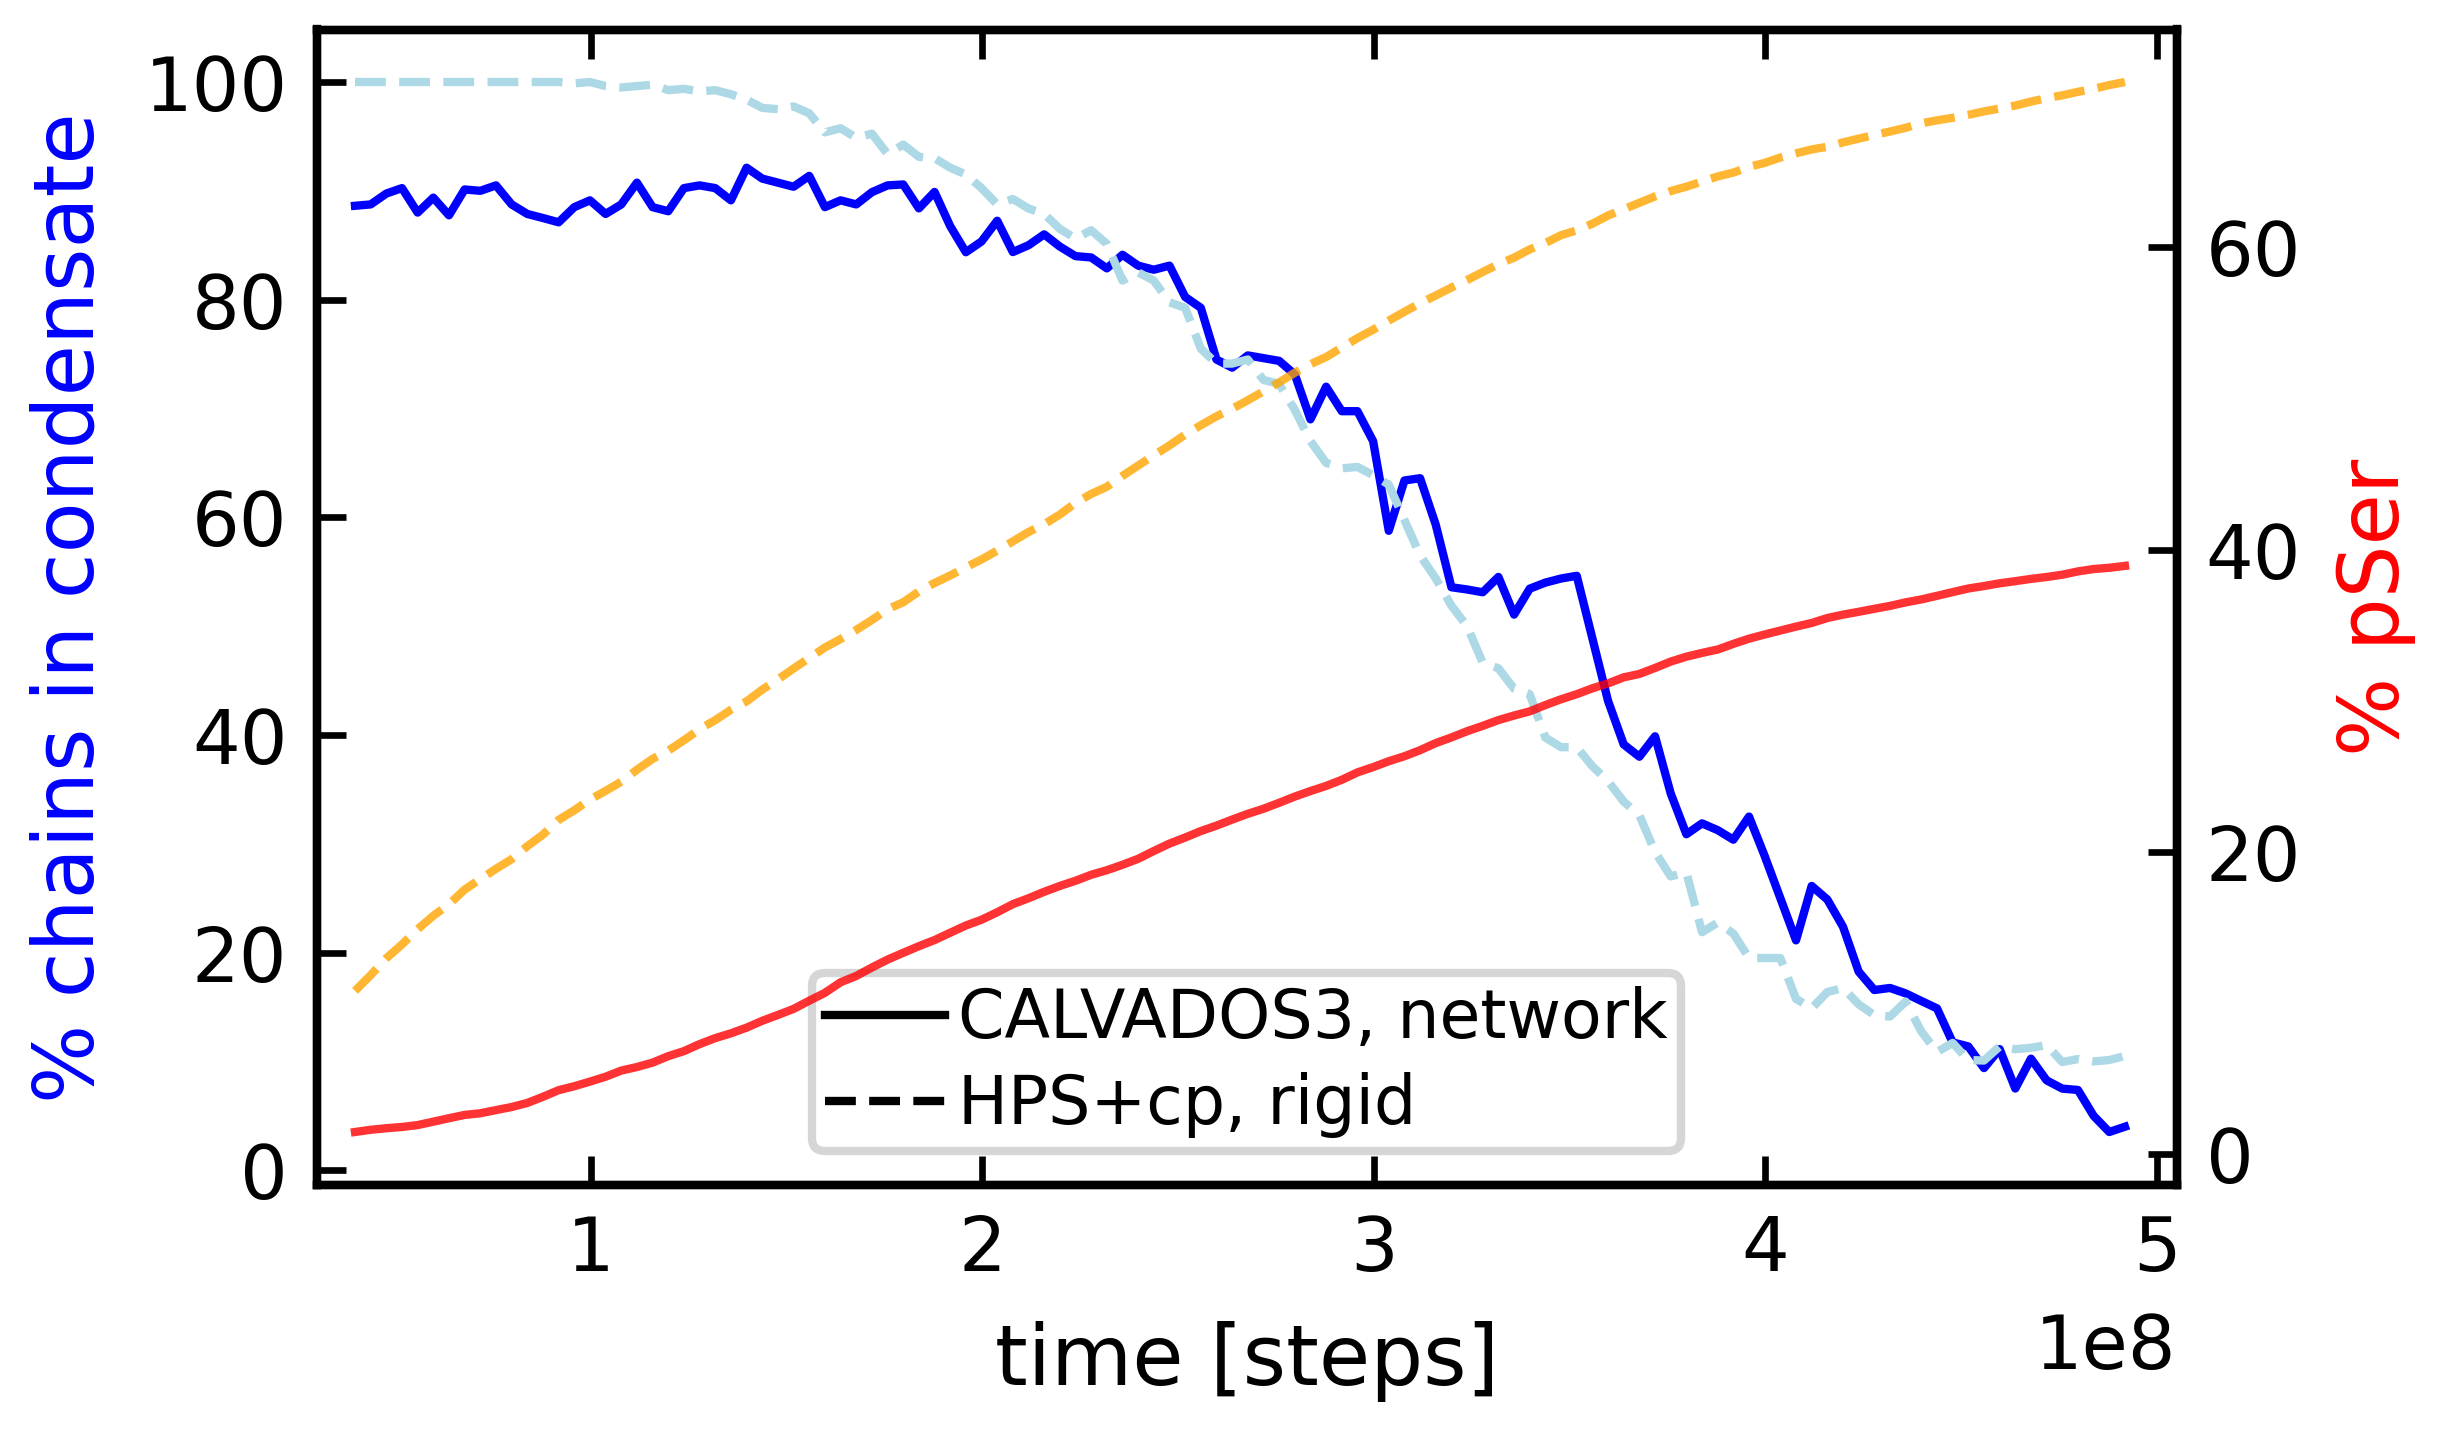

In [21]:
time_step = times*200000
#td_5 = np.where(nc_5ck1d/200 == 0.995)[0][0]

fig, ax1 = plt.subplots(figsize=(4, 2.5))

# Plot the first array with the primary y-axis
ax1.plot(time_step[:-1], nc_5ck1d/2, 'b-')
ax1.plot(time_step[:-1], nc_5ck1d_hps/2, '--', color='lightblue')
ax1.set_xlabel('time [steps]')
ax1.set_ylabel('% chains in condensate', color='b')
ax1.plot(time_step[0], nc_5ck1d[0]/2, 'k-', label=r'CALVADOS3, network')
ax1.plot(time_step[0], nc_5ck1d[0]/2, 'k--', label=r'HPS+cp, rigid')

#secax = ax1.secondary_xaxis('top')
#secax.set_xticks([ time_step[td_5]], ['$t^\mathrm{5CK1\delta}_\mathrm{diss}$'], fontsize='x-small' )
#secax.tick_params(direction='in', color='grey' , length=0)

#ax1.vlines([time_step[td_5]],ymin=-10,ymax=105, ls=['-.'] ,color='grey', linewidth=1, alpha=0.6)
#ax1.set_ylim((-10,105))

# Create a secondary y-axis and plot the second array
ax2 = ax1.twinx()
ax2.plot(time_step[:-1], np_5ck1d/48, 'r-', alpha=0.8)
ax2.plot(time_step[:-1], np_5ck1d_hps/48, '--', color='orange', alpha=0.8)
ax2.set_ylabel('% pSer', color='r')
#ax2.hlines([ np_5ck1d[td_5]],xmin=0.3*10**8,xmax=5.05*10**8, ls=['-.'], color='grey', linewidth=1, alpha=0.6)
ax2.set_xlim((0.3*10**8,5.05*10**8))

#ax2.plot([time_step[td_5]], [ np_5ck1d[td_5]], 'or', alpha=0.4, ms=5)

ax1.legend(ncols=1, loc='lower center')

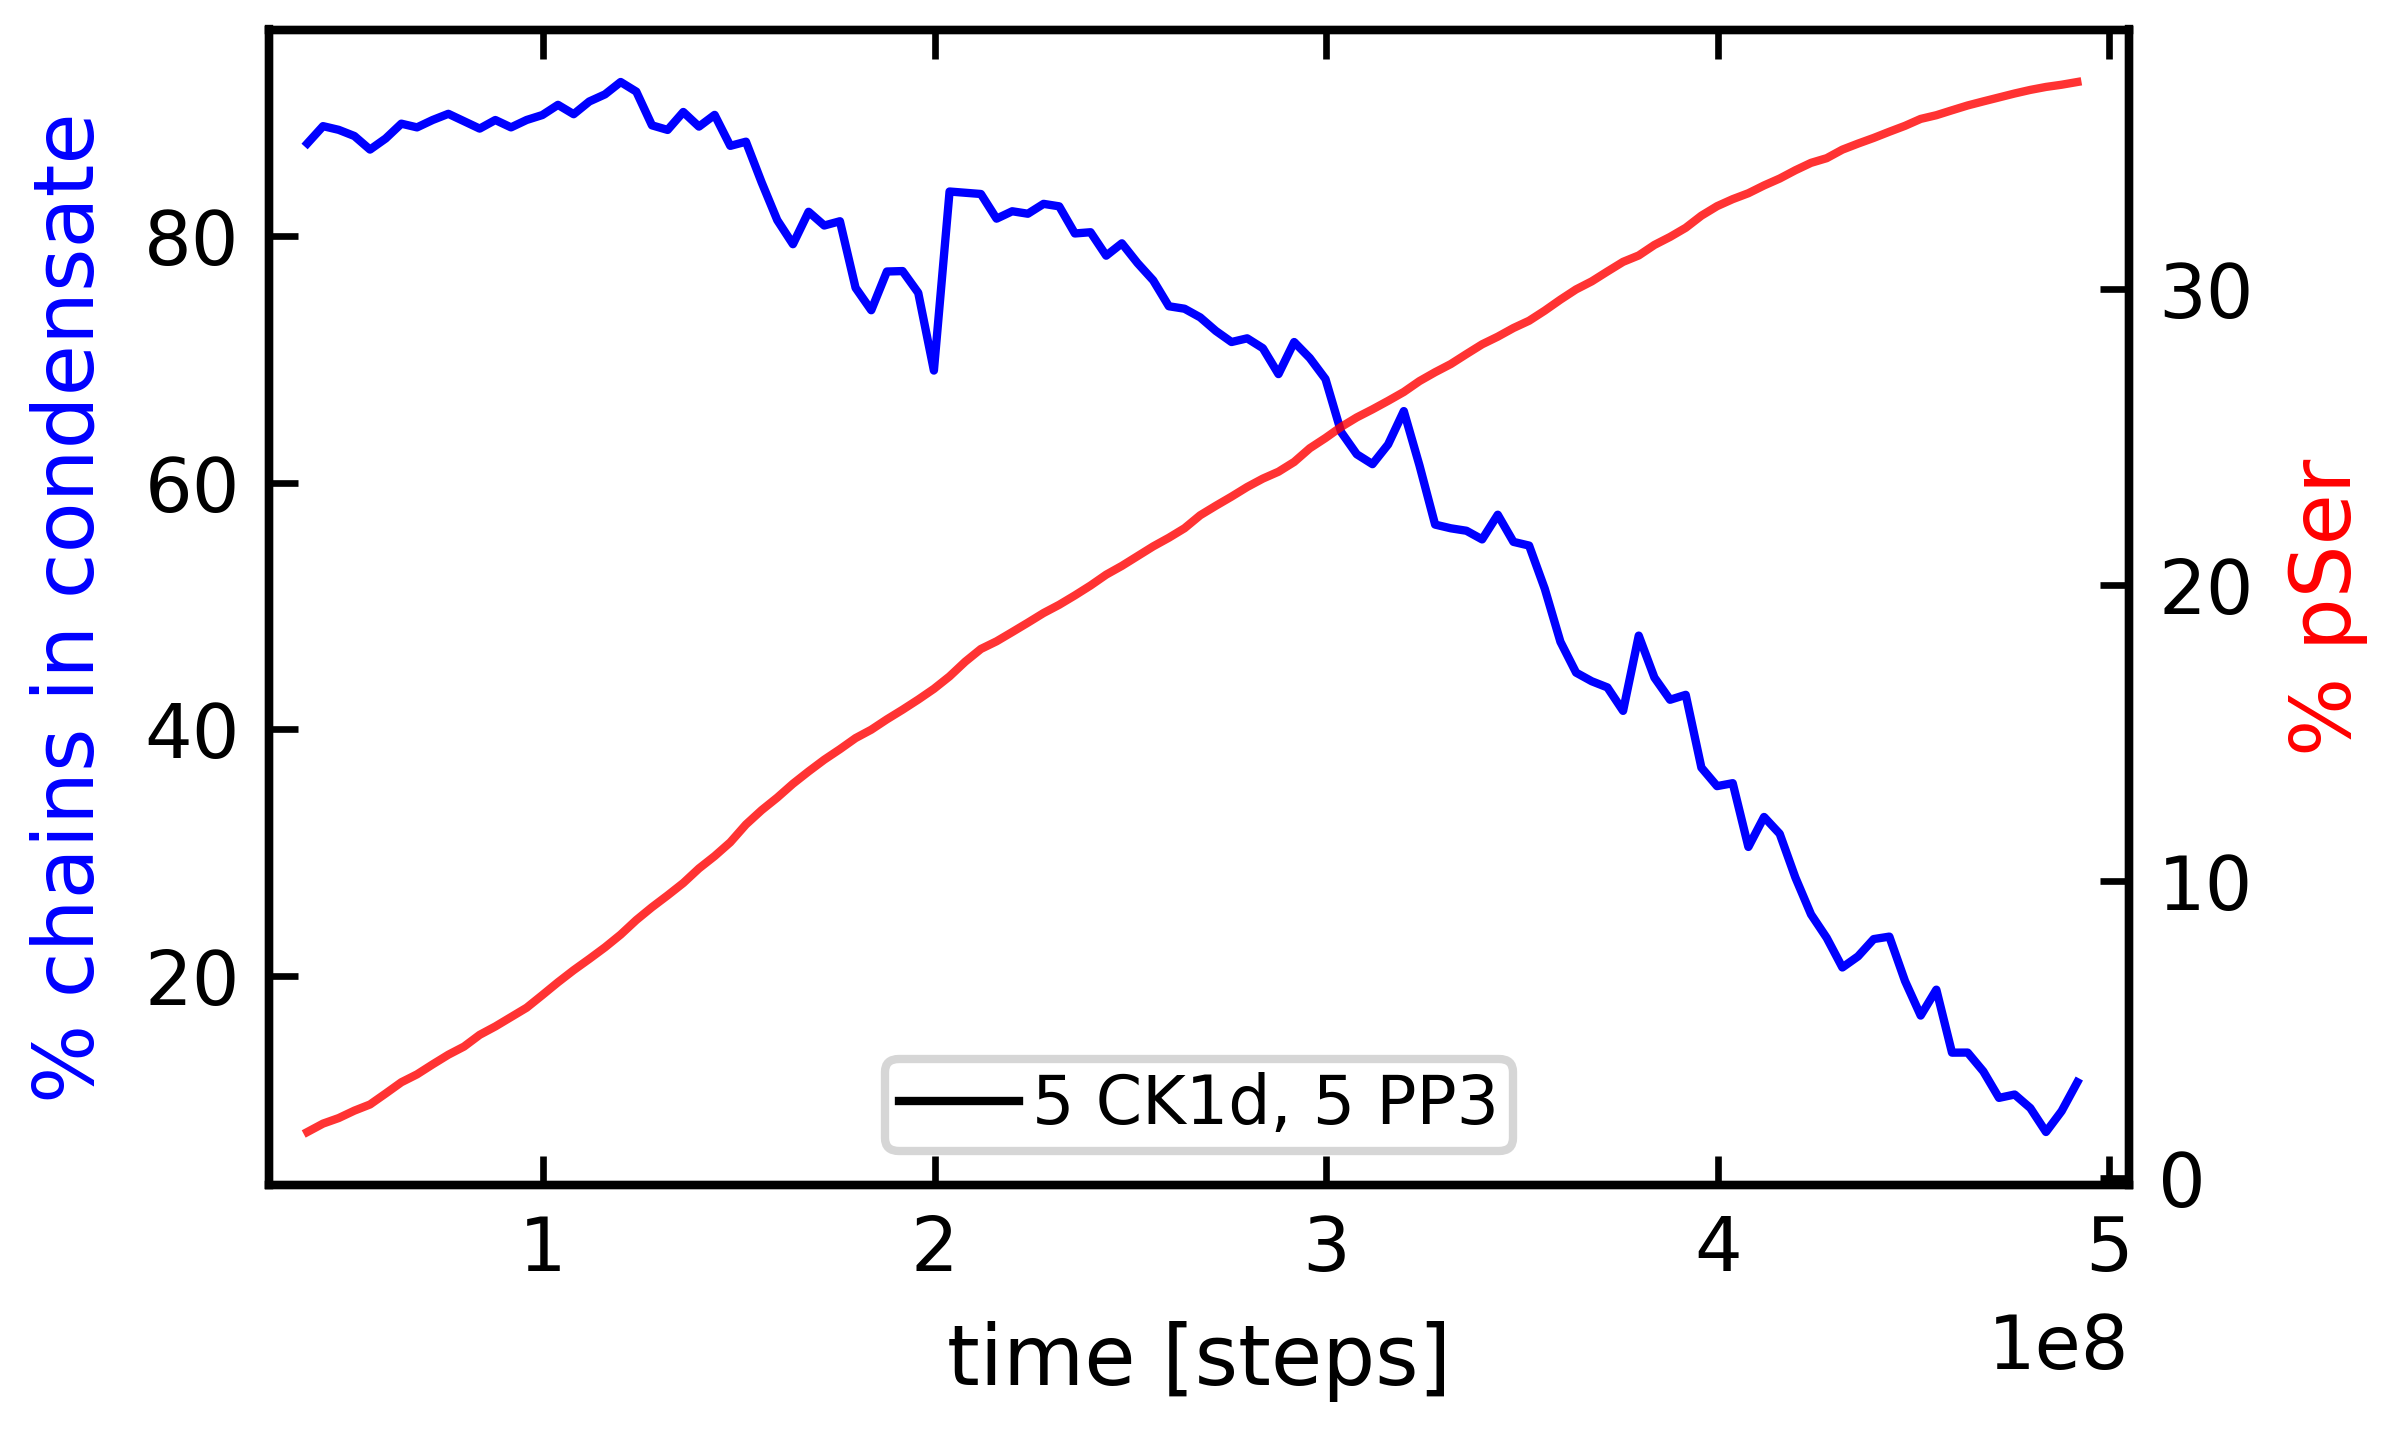

In [10]:
time_step = times*200000
#td_5 = np.where(nc_5ck1d/200 == 0.995)[0][0]

fig, ax1 = plt.subplots(figsize=(4, 2.5))

# Plot the first array with the primary y-axis
ax1.plot(time_step[:-1], nc_5ck1d_5pp3/2, 'b-')
ax1.set_xlabel('time [steps]')
ax1.set_ylabel('% chains in condensate', color='b')
ax1.plot(time_step[0], nc_5ck1d_5pp3[0]/2, 'k-', label=r'5 CK1d, 5 PP3')

#secax = ax1.secondary_xaxis('top')
#secax.set_xticks([ time_step[td_5]], ['$t^\mathrm{5CK1\delta}_\mathrm{diss}$'], fontsize='x-small' )
#secax.tick_params(direction='in', color='grey' , length=0)

#ax1.vlines([time_step[td_5]],ymin=-10,ymax=105, ls=['-.'] ,color='grey', linewidth=1, alpha=0.6)
#ax1.set_ylim((-10,105))

# Create a secondary y-axis and plot the second array
ax2 = ax1.twinx()
ax2.plot(time_step[:-1], np_5ck1d_5pp3/48, 'r-', alpha=0.8)
ax2.set_ylabel('% pSer', color='r')
#ax2.hlines([ np_5ck1d[td_5]],xmin=0.3*10**8,xmax=5.05*10**8, ls=['-.'], color='grey', linewidth=1, alpha=0.6)
ax2.set_xlim((0.3*10**8,5.05*10**8))

#ax2.plot([time_step[td_5]], [ np_5ck1d[td_5]], 'or', alpha=0.4, ms=5)

ax1.legend(ncols=1, loc='lower center')

## Density profile droplet


In [12]:
file_ck1d_in = '/localscratch/zippoema/working_dir/condensate_struct_CAL3/sim_eq_200-tdp43-lcd_5-ck1d-open/sim1_200-tdp43-lcd-961pser_5-com-ck1d-open_CAL3_eq_dump_centered.gsd'
step = 5
times_fin = np.arange(10,500,step, dtype=int)
bin_edges = np.linspace(0,25,50)

counts_ser_in = np.zeros(len(bin_edges)-1)
counts_pser_in = np.zeros(len(bin_edges)-1)
counts_enz_in = np.zeros(len(bin_edges)-1)

tmp_counts_ser_in, tmp_counts_pser_in = hpacl.radial_distribution_pSer(file_ck1d_in, times_fin, bin_edges, nenz=5, norm_particles=False)
tmp_counts_enz_in = hpacl.radial_distribution_enzyme(file_ck1d_in, times_fin, bin_edges, nenz=5, norm_particles=False)
counts_ser_in += tmp_counts_ser_in
counts_enz_in += tmp_counts_enz_in 

/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


500


100%|███████████████████████████████████████████| 98/98 [00:10<00:00,  9.68it/s]
/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


500


  1%|▍                                           | 1/98 [00:00<00:09,  9.83it/s]

4.982876712328767


  3%|█▎                                          | 3/98 [00:00<00:09,  9.97it/s]

4.982876712328767
4.982876712328767
4.982876712328767


  5%|██▏                                         | 5/98 [00:00<00:09,  9.96it/s]

4.982876712328767


  6%|██▋                                         | 6/98 [00:00<00:09,  9.96it/s]

4.982876712328767
4.982876712328767


  8%|███▌                                        | 8/98 [00:00<00:08, 10.03it/s]

4.982876712328767


 10%|████▍                                      | 10/98 [00:00<00:08, 10.08it/s]

4.982876712328767
4.982876712328767
4.982876712328767


 12%|█████▎                                     | 12/98 [00:01<00:08, 10.08it/s]

4.982876712328767
4.982876712328767


 14%|██████▏                                    | 14/98 [00:01<00:08, 10.07it/s]

4.982876712328767
4.982876712328767


 16%|███████                                    | 16/98 [00:01<00:08, 10.01it/s]

4.982876712328767
4.982876712328767


 18%|███████▉                                   | 18/98 [00:01<00:08,  9.92it/s]

4.982876712328767


 19%|████████▎                                  | 19/98 [00:01<00:07,  9.94it/s]

4.982876712328767
4.982876712328767


 21%|█████████▏                                 | 21/98 [00:02<00:07,  9.97it/s]

4.982876712328767


 22%|█████████▋                                 | 22/98 [00:02<00:07,  9.93it/s]

4.982876712328767


 23%|██████████                                 | 23/98 [00:02<00:07,  9.94it/s]

4.982876712328767


 24%|██████████▌                                | 24/98 [00:02<00:07,  9.91it/s]

4.982876712328767


 26%|██████████▉                                | 25/98 [00:02<00:07,  9.84it/s]

4.982876712328767


 27%|███████████▍                               | 26/98 [00:02<00:07,  9.79it/s]

4.982876712328767


 28%|███████████▊                               | 27/98 [00:02<00:07,  9.77it/s]

4.982876712328767


 29%|████████████▎                              | 28/98 [00:02<00:07,  9.77it/s]

4.982876712328767


 30%|████████████▋                              | 29/98 [00:02<00:07,  9.79it/s]

4.982876712328767


 31%|█████████████▏                             | 30/98 [00:03<00:06,  9.83it/s]

4.982876712328767
4.982876712328767


 33%|██████████████                             | 32/98 [00:03<00:06,  9.93it/s]

4.982876712328767


 34%|██████████████▍                            | 33/98 [00:03<00:06,  9.89it/s]

4.982876712328767


 35%|██████████████▉                            | 34/98 [00:03<00:06,  9.89it/s]

4.982876712328767


 36%|███████████████▎                           | 35/98 [00:03<00:06,  9.91it/s]

4.982876712328767


 37%|███████████████▊                           | 36/98 [00:03<00:06,  9.84it/s]

4.982876712328767


 38%|████████████████▏                          | 37/98 [00:03<00:06,  9.85it/s]

4.982876712328767


 39%|████████████████▋                          | 38/98 [00:03<00:06,  9.85it/s]

4.982876712328767


 40%|█████████████████                          | 39/98 [00:03<00:05,  9.87it/s]

4.982876712328767
4.982876712328767


 42%|█████████████████▉                         | 41/98 [00:04<00:05,  9.93it/s]

4.982876712328767


 43%|██████████████████▍                        | 42/98 [00:04<00:05,  9.92it/s]

4.982876712328767


 44%|██████████████████▊                        | 43/98 [00:04<00:05,  9.88it/s]

4.982876712328767


 46%|███████████████████▋                       | 45/98 [00:04<00:05,  9.92it/s]

4.982876712328767
4.982876712328767
4.982876712328767


 48%|████████████████████▌                      | 47/98 [00:04<00:05,  9.89it/s]

4.982876712328767


 49%|█████████████████████                      | 48/98 [00:04<00:05,  9.85it/s]

4.982876712328767


 50%|█████████████████████▌                     | 49/98 [00:04<00:04,  9.86it/s]

3.982876712328767


 51%|█████████████████████▉                     | 50/98 [00:05<00:04,  9.87it/s]

3.982876712328767


 53%|██████████████████████▊                    | 52/98 [00:05<00:04,  9.96it/s]

3.982876712328767
3.982876712328767
3.982876712328767


 55%|███████████████████████▋                   | 54/98 [00:05<00:04,  9.98it/s]

3.982876712328767
3.982876712328767
3.982876712328767

 58%|█████████████████████████                  | 57/98 [00:05<00:04,  9.97it/s]


4.982876712328767


 61%|██████████████████████████▎                | 60/98 [00:06<00:03, 10.01it/s]

4.982876712328767
4.982876712328767
4.982876712328767


 64%|███████████████████████████▋               | 63/98 [00:06<00:03, 10.04it/s]

4.982876712328767
4.982876712328767
4.982876712328767


 66%|████████████████████████████▌              | 65/98 [00:06<00:03, 10.03it/s]

4.982876712328767
4.982876712328767
4.982876712328767


 70%|██████████████████████████████▎            | 69/98 [00:06<00:02, 10.04it/s]

4.982876712328767
4.982876712328767
4.982876712328767


 72%|███████████████████████████████▏           | 71/98 [00:07<00:02, 10.04it/s]

4.982876712328767
4.982876712328767
4.982876712328767


 77%|████████████████████████████████▉          | 75/98 [00:07<00:02, 10.06it/s]

4.982876712328767
4.982876712328767
4.982876712328767


 79%|█████████████████████████████████▊         | 77/98 [00:07<00:02, 10.05it/s]

4.982876712328767
4.982876712328767
4.982876712328767


 83%|███████████████████████████████████▌       | 81/98 [00:08<00:01, 10.10it/s]

4.982876712328767
4.982876712328767
4.982876712328767


 85%|████████████████████████████████████▍      | 83/98 [00:08<00:01, 10.10it/s]

4.982876712328767
4.982876712328767
4.982876712328767


 89%|██████████████████████████████████████▏    | 87/98 [00:08<00:01, 10.02it/s]

4.982876712328767
4.982876712328767
4.982876712328767


 91%|███████████████████████████████████████    | 89/98 [00:08<00:00,  9.98it/s]

4.982876712328767
4.982876712328767


 93%|███████████████████████████████████████▉   | 91/98 [00:09<00:00,  9.94it/s]

4.982876712328767
4.982876712328767


 95%|████████████████████████████████████████▊  | 93/98 [00:09<00:00,  9.91it/s]

4.982876712328767
4.982876712328767


 97%|█████████████████████████████████████████▋ | 95/98 [00:09<00:00,  9.89it/s]

4.982876712328767
4.982876712328767


 99%|██████████████████████████████████████████▌| 97/98 [00:09<00:00,  9.86it/s]

4.982876712328767
4.982876712328767


100%|███████████████████████████████████████████| 98/98 [00:09<00:00,  9.96it/s]

4.982876712328767


(0.0, 31.0)

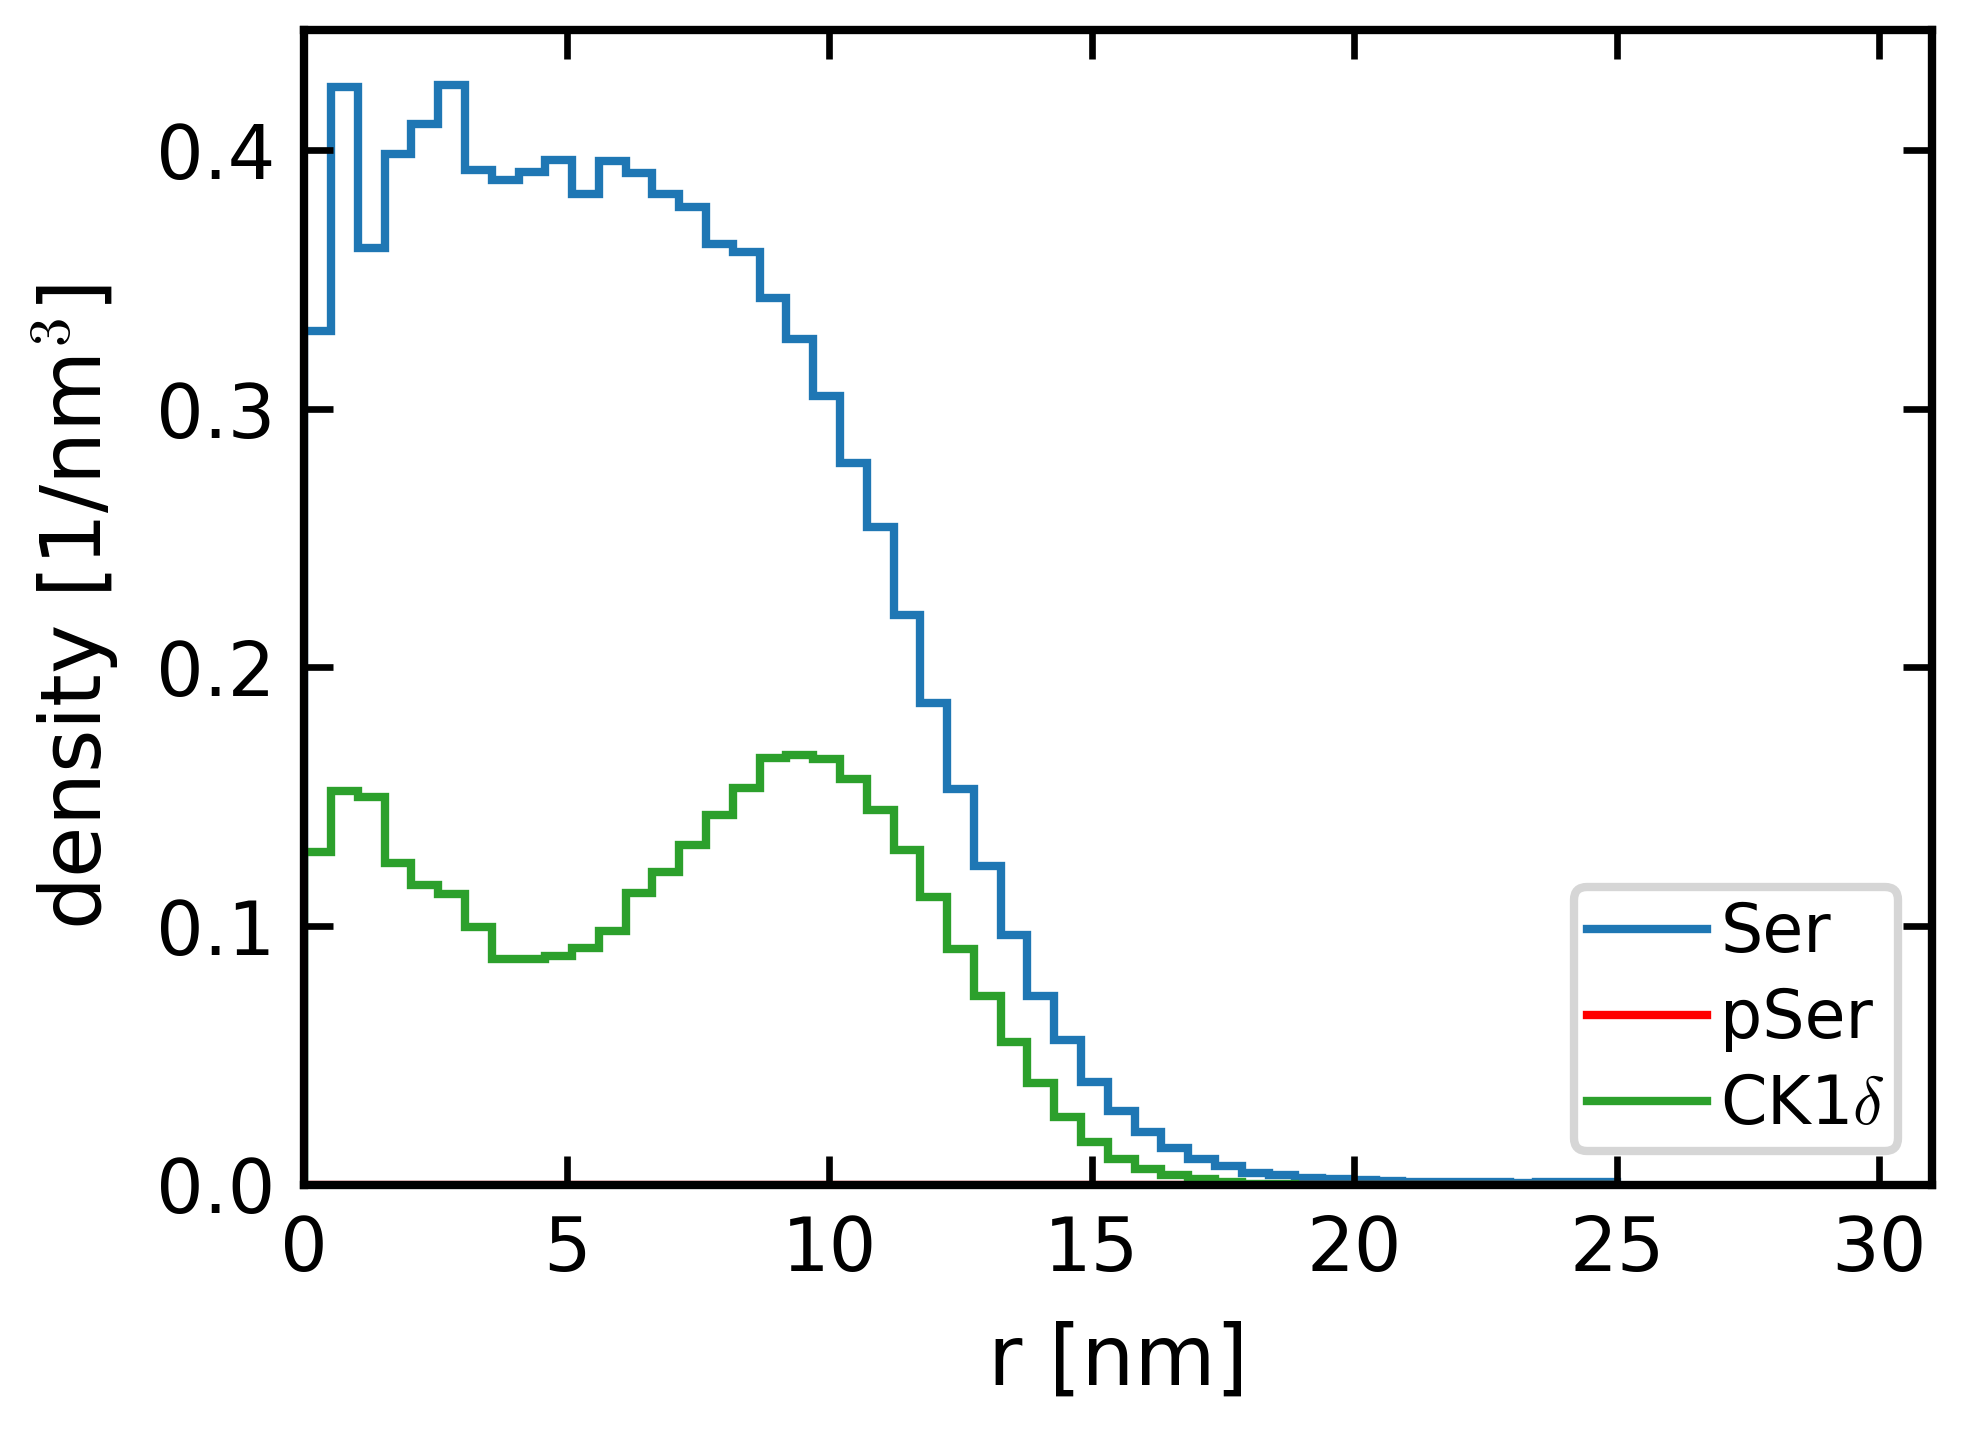

In [13]:
fig, ax = plt.subplots(figsize=(3.5,2.5))

plt.stairs(counts_ser_in, bin_edges, label='Ser')
plt.stairs(counts_pser_in, bin_edges, color='r', label='pSer')
plt.stairs(counts_enz_in, bin_edges, color='tab:green', label='CK1$\delta$')

plt.legend(loc='lower right')
plt.xlabel('r [nm]')
plt.ylabel('density [1/nm$^3$]')
plt.xlim(0,31)

### Density profile slab

In [7]:
path_dir = '/localscratch/zippoema/working_dir/condensate_struct_CAL3/'


In [9]:
filename = 'sim_eq_slab_200-tdp43-lcd_2-ck1d-open_10-pp3/sim_eq_slab_200-tdp43-lcd-839pser_2-com-ck1d-open_10-com-pp3_CAL3_dump_centered.gsd'

bin_centers_ck1d_p, density_ck1d_p = hpau.compute_density_profile(path_dir+filename, axis=2, 
                                                         nbins=200, group=[i for i in range(30800,30800+292+292)])
bin_centers_pp3_p, density_pp3_p = hpau.compute_density_profile(path_dir+filename, axis=2, 
                                                         nbins=200, group=[i for i in range(30800+292+292,36654)])
bin_centers_tdp_p, density_tdp_p = hpau.compute_density_profile(path_dir+filename, axis=2, 
                                                         nbins=200, group=[i for i in range(0,30800)])


In [8]:
filename = 'sim_eq_slab_400-tdp43-lcd_5-ck1d-open/sim_eq_slab_400-tdp43-lcd_5-com-ck1d-open_CAL3_dump_centered.gsd'

bin_centers_ck1d, density_ck1d = hpau.compute_density_profile(path_dir+filename, axis=2, 
                                                         nbins=200, group=[i for i in range(61600,61600+292*5)])
#bin_centers_pp3, density_pp3 = hpau.compute_density_profile(path_dir+filename, axis=2, 
#                                                         nbins=200, group=[i for i in range(30800+292+292,36654)])
bin_centers_tdp, density_tdp = hpau.compute_density_profile(path_dir+filename, axis=2, 
                                                         nbins=200, group=[i for i in range(0,61600)])


/localscratch/zippoema/lib/python_envs/hpa_env/lib/python3.11/site-packages/gsd/hoomd.py:1125: FutureWarning: The 'rb' mode is deprecated, use 'r'
  gsdfileobj = fl.open(name=str(name),


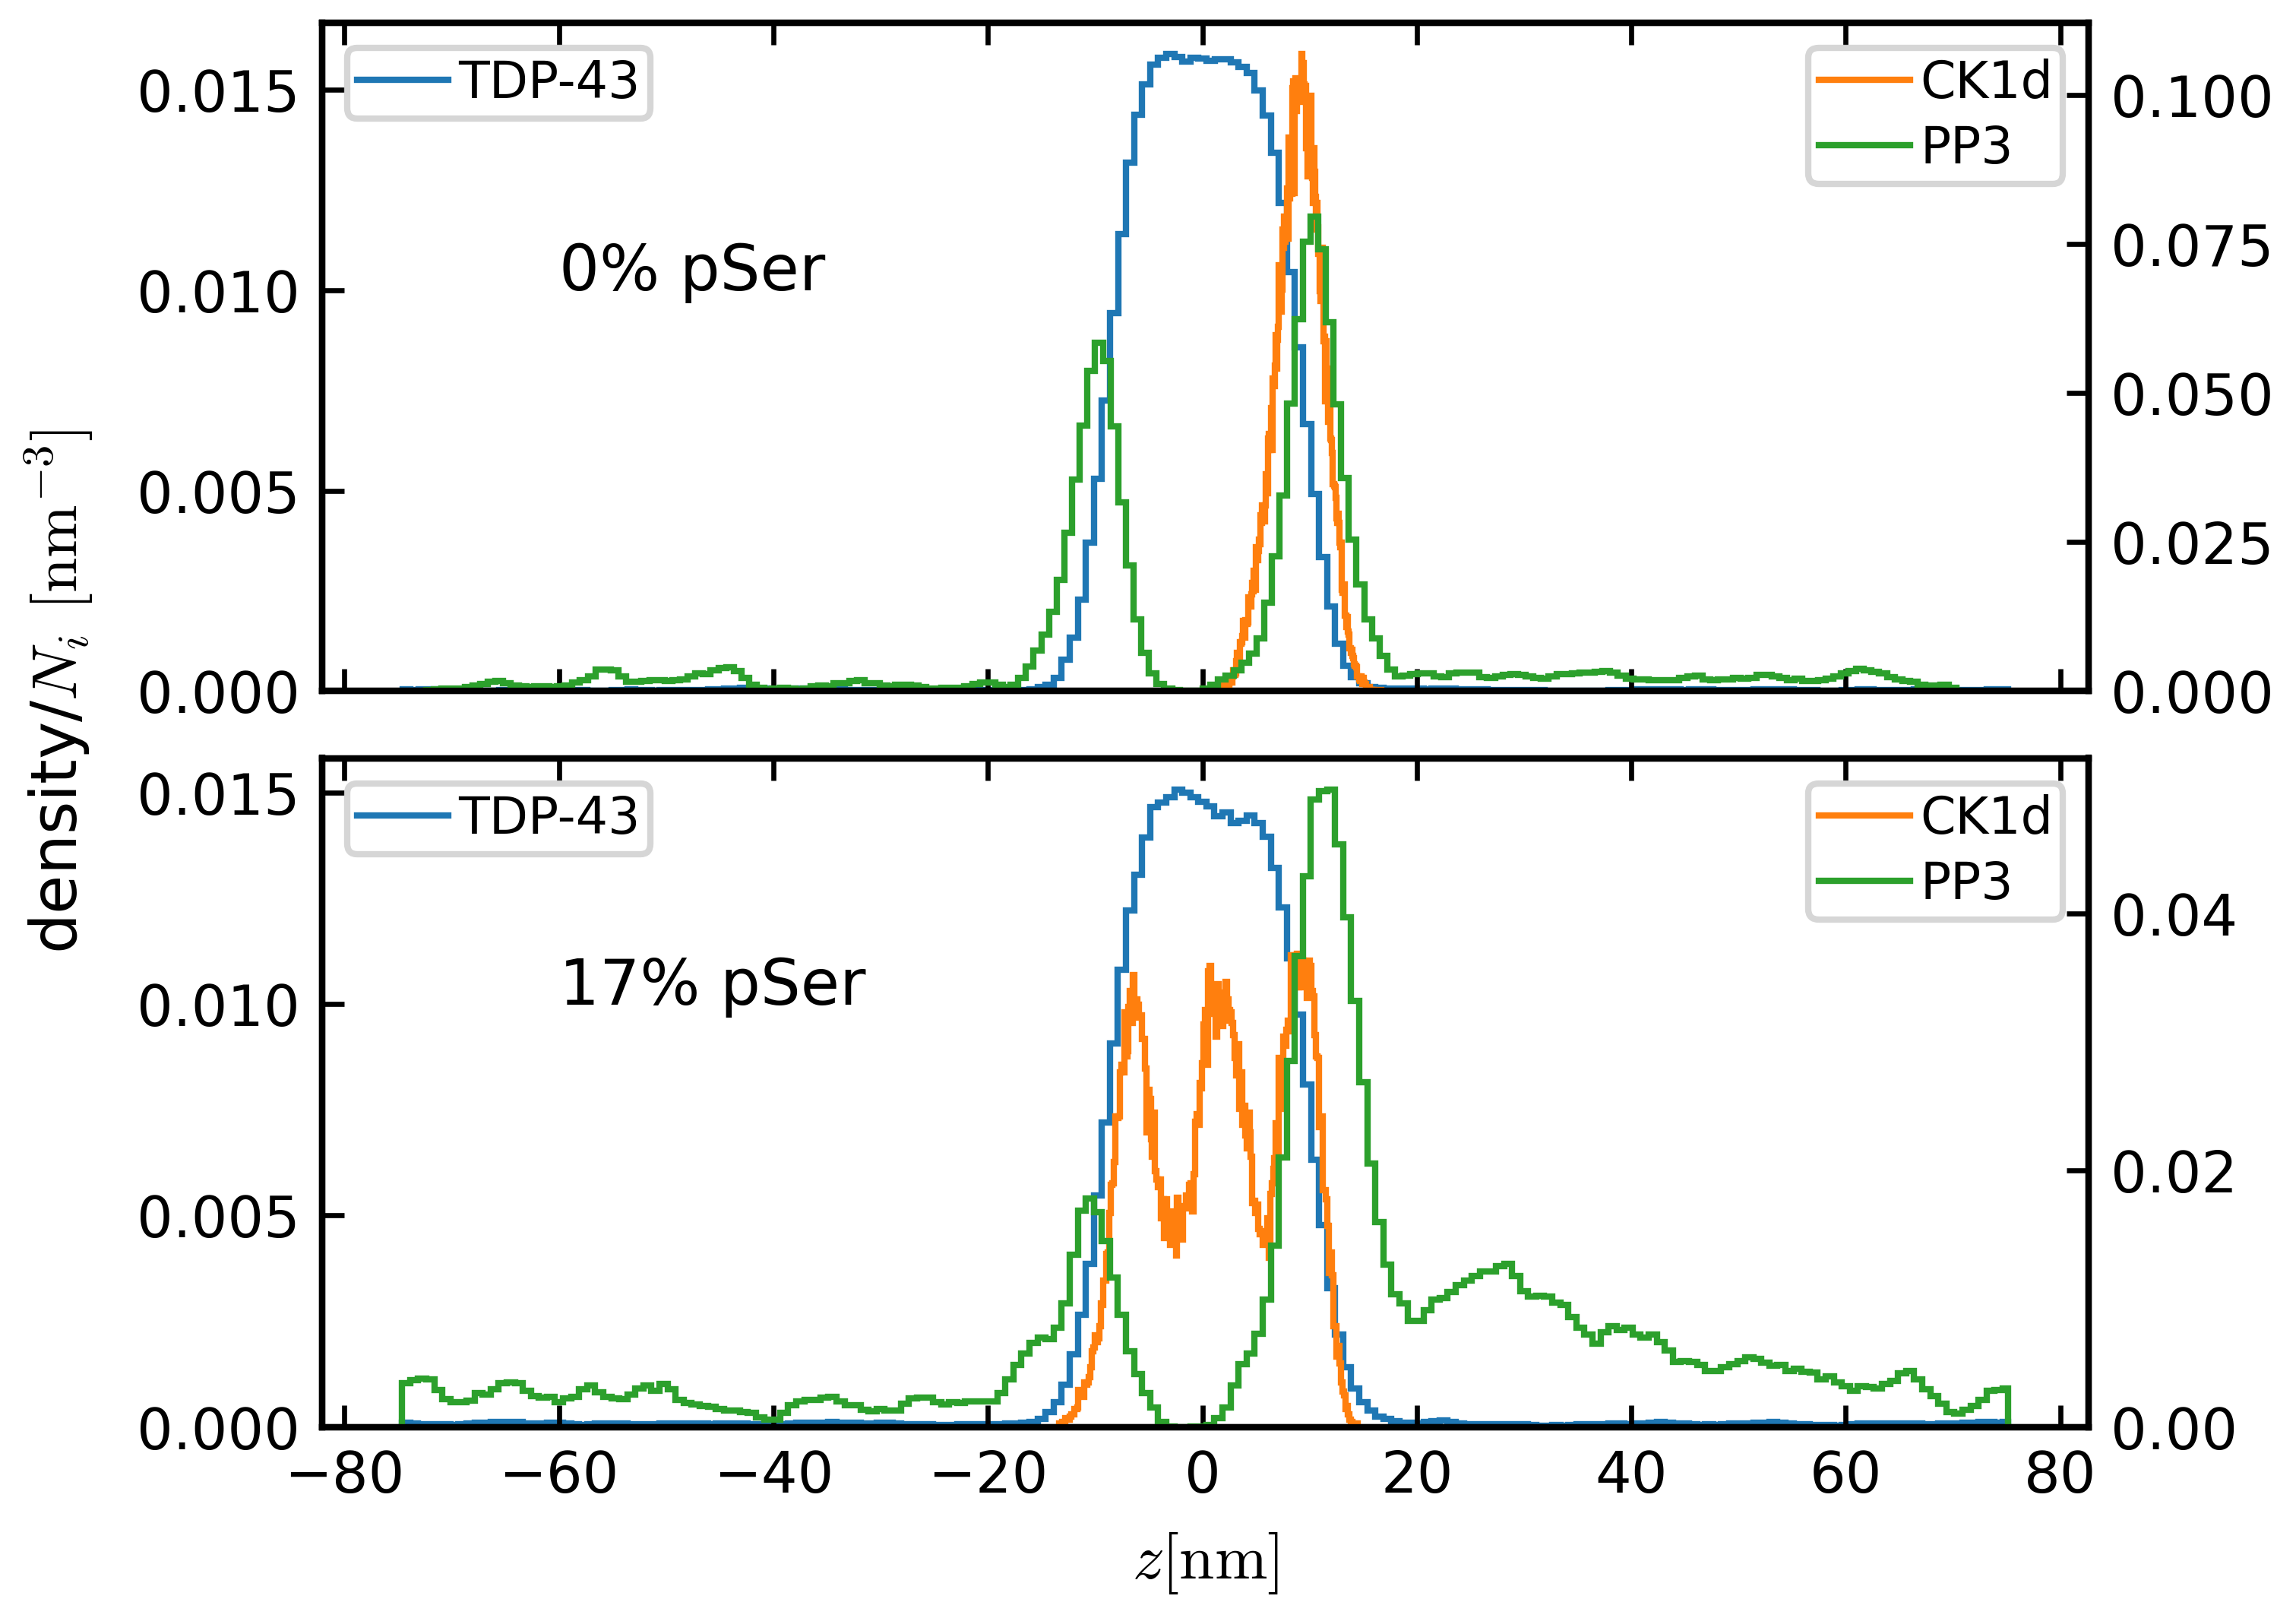

In [61]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(5,4), sharex=True)
plt.subplots_adjust(hspace=0.1)

ax11 = ax1.twinx()
ax1.stairs(density_tdp/200, np.append(bin_centers_tdp,bin_centers_tdp[-1]+0.5), ls='-', color='tab:blue', label='TDP-43')
ax11.stairs(density_ck1d/2, np.append(bin_centers_ck1d,bin_centers_ck1d[-1]+0.5), color='tab:orange', label='CK1d')
ax11.stairs(density_pp3/10, np.append(bin_centers_pp3,bin_centers_pp3[-1]+0.5), color='tab:green', label='PP3')

ax21 = ax2.twinx()
ax2.stairs(density_tdp_p/200, np.append(bin_centers_tdp_p,bin_centers_tdp_p[-1]+0.5), ls='-', color='tab:blue', label='TDP-43')
ax21.stairs(density_ck1d_p/2, np.append(bin_centers_ck1d_p,bin_centers_ck1d_p[-1]+0.5), ls='-', color='tab:orange', label='CK1d')
ax21.stairs(density_pp3_p/10, np.append(bin_centers_pp3_p,bin_centers_pp3_p[-1]+0.5), ls='-', color='tab:green', label='PP3')

ax1.legend(loc='upper left', )
ax2.legend(loc='upper left', )
ax11.legend(loc='upper right', )
ax21.legend(loc='upper right', )

ax2.set_xlabel('$z [\mathrm{nm}]$')
ax1.text(-110, 0., r'density/$N_i$ $[\mathrm{nm}^{-3}]$', va='center', rotation='vertical')

ax1.text(-60, 0.01, '0% pSer')
ax2.text(-60, 0.01, '17% pSer')

plt.savefig(path_dir+f'sim_eq_slab_200-tdp43-lcd_2-ck1d-open_10-pp3/density_profile.png', dpi=1200)


Text(-60, 0.01, '17% pSer')

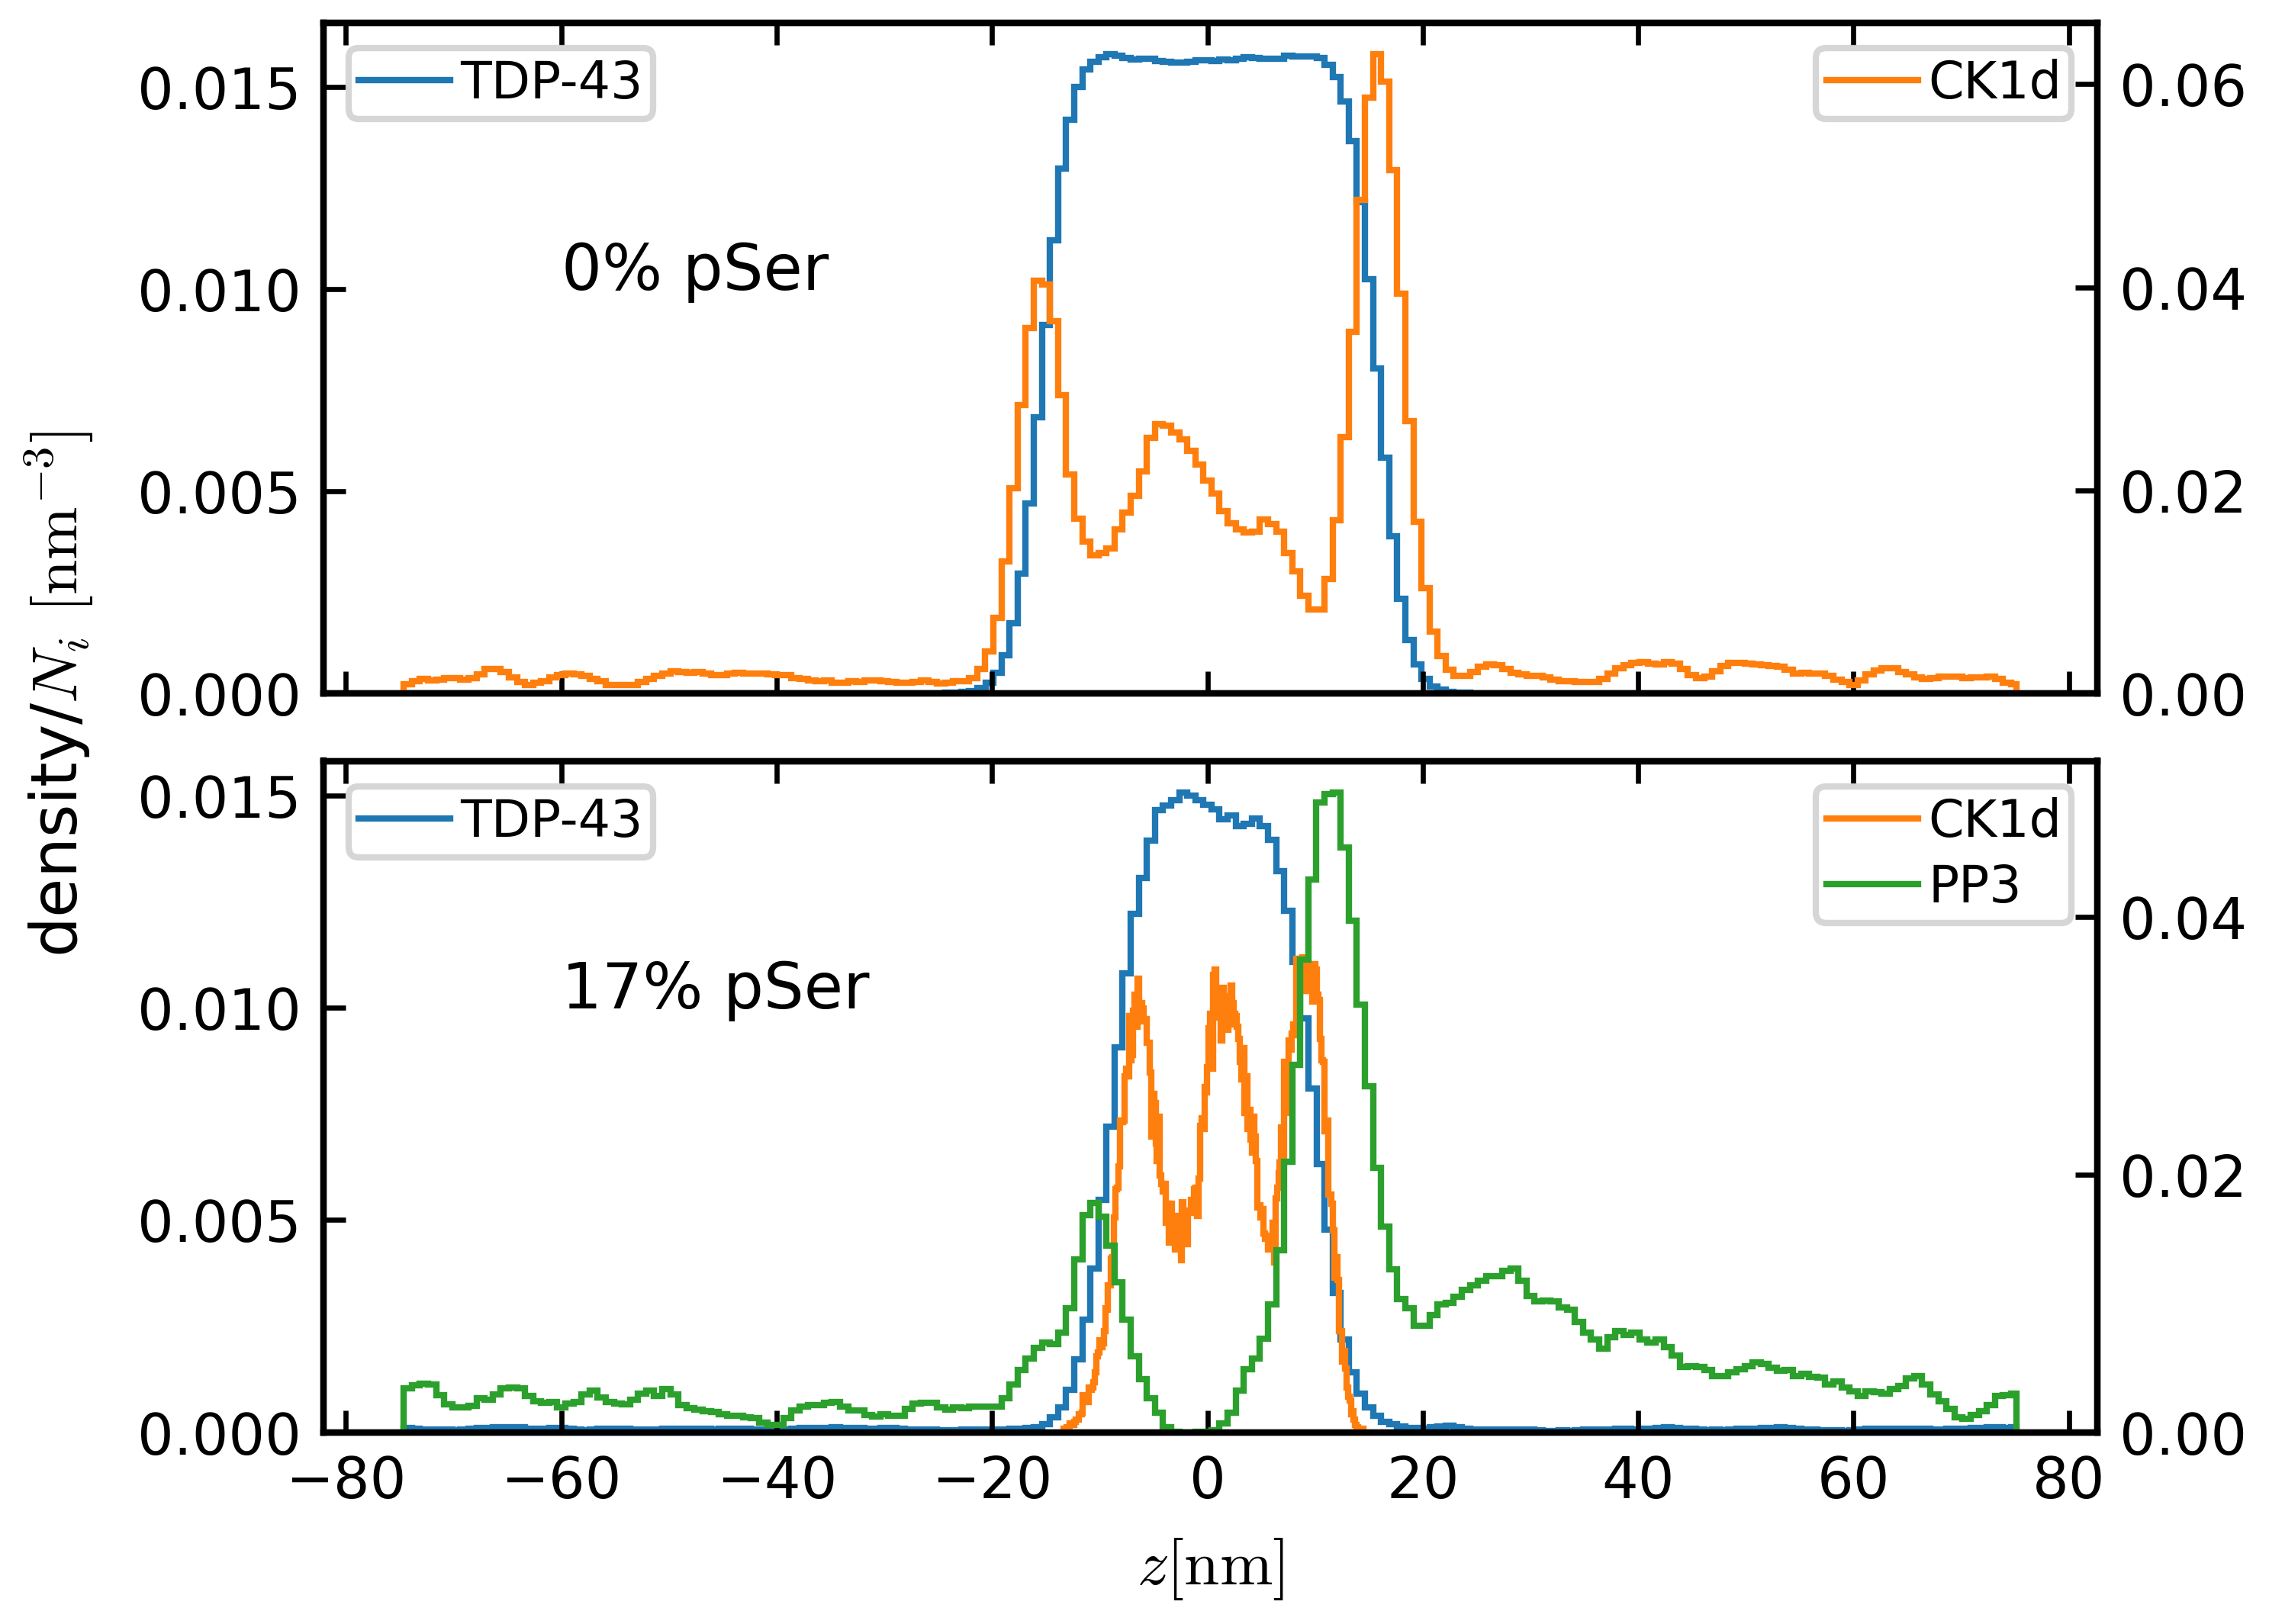

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(5,4), sharex=True)
plt.subplots_adjust(hspace=0.1)

ax11 = ax1.twinx()
ax1.stairs(density_tdp/200, np.append(bin_centers_tdp,bin_centers_tdp[-1]+0.5), ls='-', color='tab:blue', label='TDP-43')
ax11.stairs(density_ck1d/2, np.append(bin_centers_ck1d,bin_centers_ck1d[-1]+0.5), color='tab:orange', label='CK1d')

ax21 = ax2.twinx()
ax2.stairs(density_tdp_p/200, np.append(bin_centers_tdp_p,bin_centers_tdp_p[-1]+0.5), ls='-', color='tab:blue', label='TDP-43')
ax21.stairs(density_ck1d_p/2, np.append(bin_centers_ck1d_p,bin_centers_ck1d_p[-1]+0.5), ls='-', color='tab:orange', label='CK1d')
ax21.stairs(density_pp3_p/10, np.append(bin_centers_pp3_p,bin_centers_pp3_p[-1]+0.5), ls='-', color='tab:green', label='PP3')

ax1.legend(loc='upper left', )
ax2.legend(loc='upper left', )
ax11.legend(loc='upper right', )
ax21.legend(loc='upper right', )

ax2.set_xlabel('$z [\mathrm{nm}]$')
ax1.text(-110, 0., r'density/$N_i$ $[\mathrm{nm}^{-3}]$', va='center', rotation='vertical')

ax1.text(-60, 0.01, '0% pSer')
ax2.text(-60, 0.01, '17% pSer')

#plt.savefig(path_dir+f'sim_eq_slab_200-tdp43-lcd_2-ck1d-open_10-pp3/density_profile.png', dpi=1200)
